In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from rich.jupyter import display

In [2]:
charging_data = pd.read_pickle(os.path.join('Data', 'charging_data.pkl'))
weather_data = pd.read_pickle(os.path.join('Data', 'weather_data.pkl'))

In [3]:
charging_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60834 entries, 0 to 65036
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype                              
---  ------               --------------  -----                              
 0   counter              60834 non-null  int64                              
 1   id                   60834 non-null  object                             
 2   connectionTime       60834 non-null  datetime64[ns, America/Los_Angeles]
 3   disconnectTime       60834 non-null  datetime64[ns, America/Los_Angeles]
 4   doneChargingTime     60834 non-null  datetime64[ns, America/Los_Angeles]
 5   kWhDelivered         60834 non-null  float64                            
 6   sessionID            60834 non-null  object                             
 7   siteID               60834 non-null  object                             
 8   spaceID              60834 non-null  object                             
 9   stationID            60834 non-nu

In [4]:
charging_data.head(20)

,counter,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs,connection_date,year_month,charging_duration,connection_duration
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 05:08:54-08:00,2020-01-02 11:11:15-08:00,2020-01-02 09:31:35-08:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...",2020-01-02,2020-01,262.683333,362.350000
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 05:36:50-08:00,2020-01-02 14:38:21-08:00,2020-01-02 12:18:05-08:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil...",2020-01-02,2020-01,401.250000,541.516667
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 05:56:35-08:00,2020-01-02 16:39:22-08:00,2020-01-02 08:35:06-08:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",2020-01-02,2020-01,158.516667,642.783333
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58-08:00,2020-01-02 08:38:39-08:00,2020-01-02 07:18:45-08:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",2020-01-02,2020-01,78.783333,158.683333
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 06:00:01-08:00,2020-01-02 14:08:40-08:00,2020-01-02 10:17:30-08:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil...",2020-01-02,2020-01,257.483333,488.650000
5,5,5e23b149f9af8b5fe4b973d4,2020-01-02 06:00:13-08:00,2020-01-02 15:00:41-08:00,2020-01-02 12:13:21-08:00,13.370,1_1_194_821_2020-01-02 14:00:05.241573,1,AG-1F13,1-1-194-821,America/Los_Angeles,3519,"[{'WhPerMile': 600, 'kWhRequested': 24.0, 'mil...",2020-01-02,2020-01,373.133333,540.466667
6,6,5e23b149f9af8b5fe4b973d5,2020-01-02 06:09:14-08:00,2020-01-02 17:57:58-08:00,2020-01-02 16:59:21-08:00,43.477,1_1_178_817_2020-01-02 14:09:14.451827,1,AG-1F09,1-1-178-817,America/Los_Angeles,933,"[{'WhPerMile': 385, 'kWhRequested': 65.45, 'mi...",2020-01-02,2020-01,650.116667,708.733333
7,7,5e23b149f9af8b5fe4b973d6,2020-01-02 06:17:32-08:00,2020-01-02 16:44:54-08:00,2020-01-02 12:22:40-08:00,32.441,1_1_191_804_2020-01-02 14:17:32.329535,1,AG-4F34,1-1-191-804,America/Los_Angeles,3737,"[{'WhPerMile': 300, 'kWhRequested': 45.0, 'mil...",2020-01-02,2020-01,365.133333,627.366667
8,8,5e23b149f9af8b5fe4b973d7,2020-01-02 06:25:38-08:00,2020-01-02 11:36:05-08:00,2020-01-02 10:38:39-08:00,13.264,1_1_194_826_2020-01-02 14:25:37.578692,1,AG-1F11,1-1-194-826,America/Los_Angeles,419,"[{'WhPerMile': 400, 'kWhRequested': 40.0, 'mil...",2020-01-02,2020-01,253.016667,310.450000
9,9,5e23b149f9af8b5fe4b973d8,2020-01-02 06:27:40-08:00,2020-01-02 12:01:48-08:00,2020-01-02 11:17:46-08:00,13.285,1_1_178_823_2020-01-02 14:27:39.582337,1,AG-1F08,1-1-178-823,America/Los_Angeles,651,"[{'WhPerMile': 400, 'kWhRequested': 20.0, 'mil...",2020-01-02,2020-01,290.100000,334.133333


#### 2b: Key Performance Indicators


#### business interesting KPIs

**Performance of kWhDelivered**: (Amount of kWhDelivered / total Charging Duration)  per Station (SiteID) 

**idle Time**: (Discconection Time - Done Charging Time / all Station) per Station 

**Utilization**: total Charging Duration / max Charging Duration possible per Station 



In [5]:
def round_hour(date):
    if date.minute < 30:
        return date.replace(minute=0, second=0, microsecond=0)  # Previous hour
    else:
        return (date + pd.Timedelta(hours=1)).replace(minute=0, second=0, microsecond=0)  # Next hour


In [6]:
def split_session(row):
    # Round times to the nearest hour
    session_start = round_hour(row['connectionTime'])
    session_end = round_hour(row['disconnectTime'])
    session_charging_done = round_hour(row['doneChargingTime'])
    
    # Calculate total durations
    total_session_duration = (session_end - session_start).total_seconds() / 3600  # Connection Duration in hours
    total_charging_duration = (session_charging_done - session_start).total_seconds() / 3600  # Charging Duration in hours
    
    hourly_data = []
    current_hour = session_start
    
    while current_hour < session_end:
        kpi_idle_time = 'n'
        kpi_hourly_kwh_delivered = 0
    
        next_hour = current_hour + pd.Timedelta(hours=1)
        if total_charging_duration <= 0:
            kpi_hourly_kwh_delivered = 0
            if total_session_duration <=0:
                kpi_idle_time = 'n'
        elif next_hour <= session_charging_done:
            kpi_hourly_kwh_delivered = (1 / total_charging_duration) * row['kWhDelivered']
            kpi_idle_time = 'n'  # Hour within charging session
        elif session_charging_done < next_hour <= session_end:
            kpi_hourly_kwh_delivered = 0  # No kWh delivered during idle
            kpi_idle_time = row['stationID']  # Mark as idle

        # Append hourly data
        hourly_data.append({
            'date': pd.to_datetime(current_hour.date()),
            'hour': current_hour.hour,
            'stationID': row['stationID'],
            'kWhDelivered': kpi_hourly_kwh_delivered,
            'idleTime': kpi_idle_time
        })
        
        # Move to next hour
        current_hour = next_hour

    return hourly_data


In [7]:
def groupByDateAndHour(data):    
    kpi_data_frame = data.groupby(['date', 'hour']).agg({
    'stationID': lambda x: x.nunique() / 107 ,  # ensures that a station which has two sessions within one hour isn't count twice 
    'kWhDelivered': ['sum'],
    'idleTime': lambda x: x[(x != 'n')].nunique() / 107}).reset_index() # ensures that a station that has two sessions (not charging) in one hour isn't double valued 
    kpi_data_frame.columns = ['date','hour', 'utilizationRate', 'kWhDelivered', 'idleTime']
    
    return kpi_data_frame


In [8]:
def calculateSpecificDate(date, data_frame):
    current_date = pd.to_datetime(date).date()
    data_frame['date'] = pd.to_datetime(data_frame['date']).dt.date
    data_result_day = data_frame[data_frame['date'] == current_date]
    
    # Add missing hours
    for hour in range(25):
        if hour not in data_result_day['hour'].values:
            missing_hour_row = {
                'date': current_date,
                'hour': hour,
                'utilizationRate': 0,
                'kWhDelivered': 0.0,
                'idleTime': 0.0
            }
            missing_hour_df = pd.DataFrame([missing_hour_row])
            data_result_day = pd.concat([data_result_day, missing_hour_df], ignore_index=True)
    
    return data_result_day

     

In [9]:
#split charging data in hours per session
split_charging_data = charging_data.apply(split_session,axis=1)
split_charging_data = pd.DataFrame([item for sublist in split_charging_data for item in sublist])


In [10]:
# group split charging data by date and hour
kpi_dataframe = groupByDateAndHour(split_charging_data)
kpi_dataframe.tail(100)

,date,hour,utilizationRate,kWhDelivered,idleTime
22130,2021-09-08,21,0.018692,4.923333,0.009346
22131,2021-09-09,4,0.009346,6.110000,0.000000
22132,2021-09-09,5,0.009346,6.110000,0.000000
22133,2021-09-09,6,0.046729,10.075182,0.009346
22134,2021-09-09,7,0.102804,25.135143,0.000000
...,...,...,...,...,...
22225,2021-09-14,3,0.009346,5.993000,0.000000
22226,2021-09-14,4,0.009346,5.993000,0.000000
22227,2021-09-14,5,0.009346,5.993000,0.000000
22228,2021-09-14,6,0.009346,5.993000,0.000000


In [11]:
#select specific day for visualisation 
specific_date = '2021-09-11'
data_result_day = calculateSpecificDate(specific_date, kpi_dataframe)
data_result_day.head(24)

,date,hour,utilizationRate,kWhDelivered,idleTime
0,2021-09-11,0,0.009346,5.349000,0.000000
1,2021-09-11,1,0.009346,5.349000,0.000000
2,2021-09-11,2,0.009346,0.000000,0.009346
3,2021-09-11,3,0.009346,0.000000,0.009346
4,2021-09-11,4,0.009346,0.000000,0.009346
5,2021-09-11,5,0.009346,0.000000,0.009346
6,2021-09-11,6,0.009346,0.000000,0.009346
7,2021-09-11,7,0.018692,4.290500,0.009346
8,2021-09-11,8,0.018692,4.290500,0.009346
9,2021-09-11,9,0.018692,0.121625,0.009346


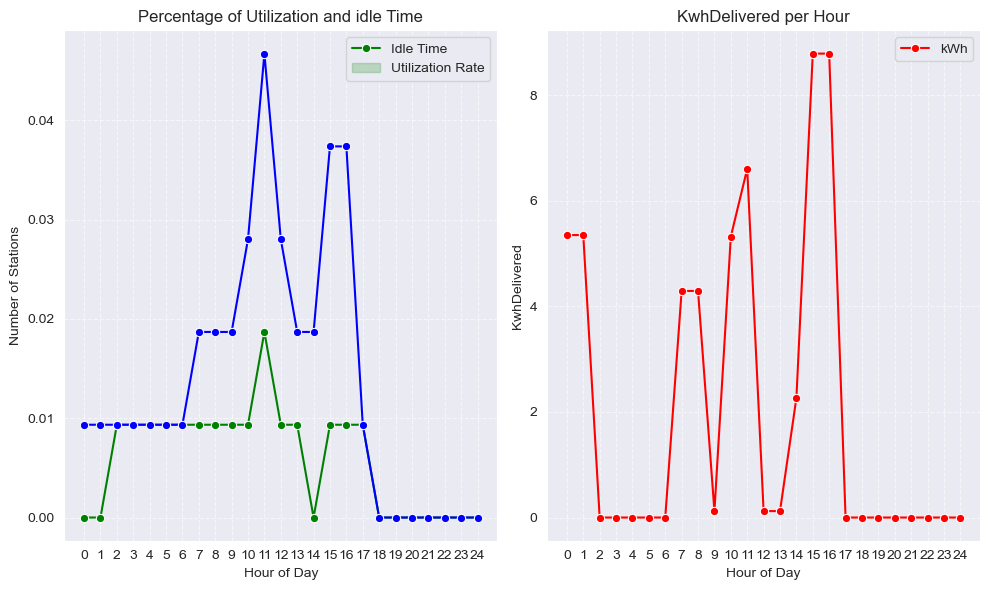

In [12]:
#Plot selected day
plt.figure(figsize=(10, 6))

# First Plot: KPI Utilization Rate and Idle Time per Day
plt.subplot(1, 2, 1)  # Subplot 1
sns.lineplot(data=data_result_day, x='hour', y='idleTime',marker='o', color='green' )
sns.lineplot(data=data_result_day, x='hour', y='utilizationRate',marker='o', color='blue' )
plt.title('Percentage of Utilization and idle Time')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Stations')
plt.legend(['Idle Time', 'Utilization Rate'])
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.xticks(ticks=range(25))

# Seond Plot: KPI kWh Delivered per Day
plt.subplot(1, 2, 2)  # Subplot 2
sns.lineplot(data=data_result_day, x='hour', y='kWhDelivered',marker='o', color='red')
plt.title('KwhDelivered per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('KwhDelivered')
plt.legend(['kWh'])
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.xticks(ticks=range(25))

plt.tight_layout()
plt.show()

In [13]:
#TESTCODE
#Test for small dataframe
testData = charging_data.iloc[:30]
split_data = testData.apply(split_session,axis=1)
split_data = pd.DataFrame([item for sublist in split_data for item in sublist])
#print(split_data.head(30))
#print(split_data.info())
data_result = groupByDateAndHour(split_data)
#print(data_result.head(50))

#### Cluster 

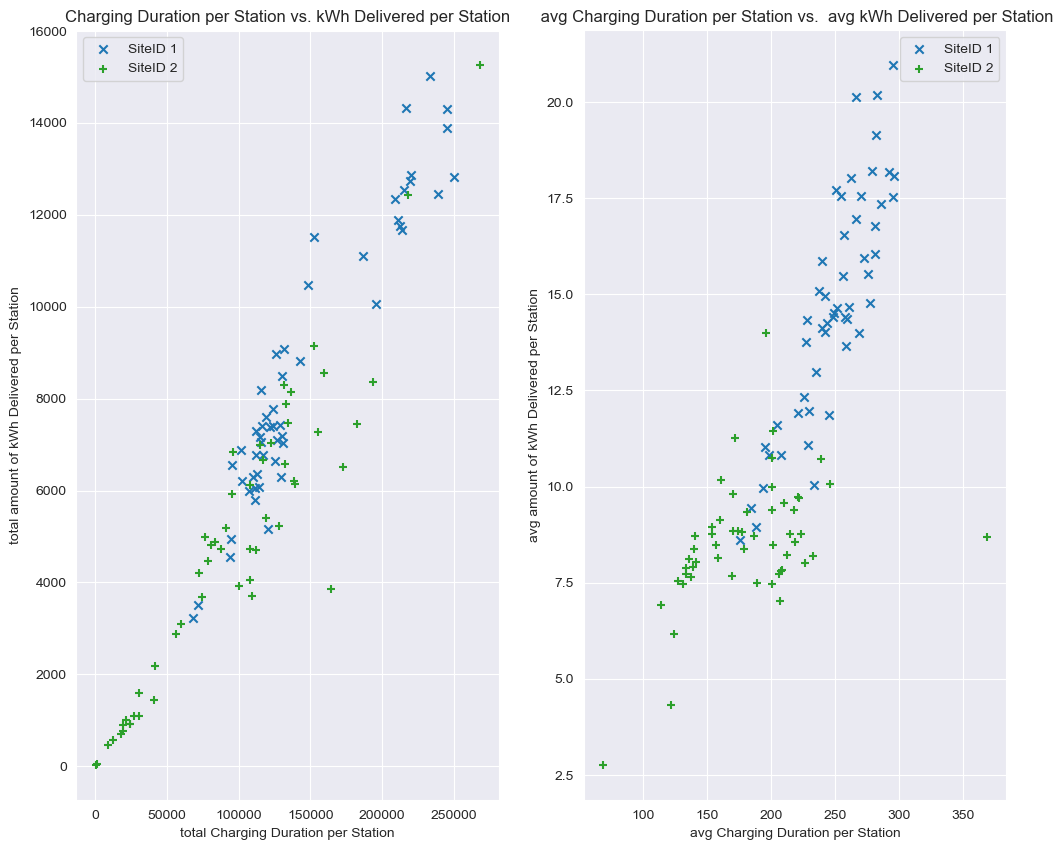

In [14]:
charging_data['hour'] = charging_data['connectionTime'].dt.hour

station_duration_kpi = charging_data.groupby('stationID').agg({
    'charging_duration': ['mean', 'sum'],
    'sessionID': ['count'],
    'kWhDelivered': ['mean', 'sum']}).reset_index()
station_duration_kpi.columns = ['stationID', 'avgChargingDuration', 'totalChargingDuration', 'numChargingEvents', 'avgkWhDelivered', 'totalkWhDelivered']

station_duration_stats = station_duration_kpi.merge(
    charging_data[['stationID', 'siteID']].drop_duplicates(),
    on='stationID',
    how='left'
)


plt.figure(figsize = (12,10))
plt.subplot(1,2,1)
plt.scatter(station_duration_stats[station_duration_stats["siteID"]=='1']["totalChargingDuration"], 
           station_duration_stats[station_duration_stats["siteID"]=='1']["totalkWhDelivered"],marker='x', color='C0')
plt.scatter(station_duration_stats[station_duration_stats["siteID"]=='2']["totalChargingDuration"], 
           station_duration_stats[station_duration_stats["siteID"]=='2']["totalkWhDelivered"], marker='+', color='C2')
plt.title("Charging Duration per Station vs. kWh Delivered per Station")
plt.xlabel("total Charging Duration per Station")
plt.ylabel("total amount of kWh Delivered per Station")
plt.legend(['SiteID 1', 'SiteID 2'])

plt.subplot(1,2,2)
plt.scatter(station_duration_stats[station_duration_stats["siteID"]=='1']["avgChargingDuration"], 
           station_duration_stats[station_duration_stats["siteID"]=='1']["avgkWhDelivered"],marker='x', color='C0')
plt.scatter(station_duration_stats[station_duration_stats["siteID"]=='2']["avgChargingDuration"], 
           station_duration_stats[station_duration_stats["siteID"]=='2']["avgkWhDelivered"], marker='+', color='C2')
plt.title(" avg Charging Duration per Station vs.  avg kWh Delivered per Station")
plt.xlabel("avg Charging Duration per Station")
plt.ylabel("avg amount of kWh Delivered per Station")
plt.legend(['SiteID 1', 'SiteID 2'])

plt.show()



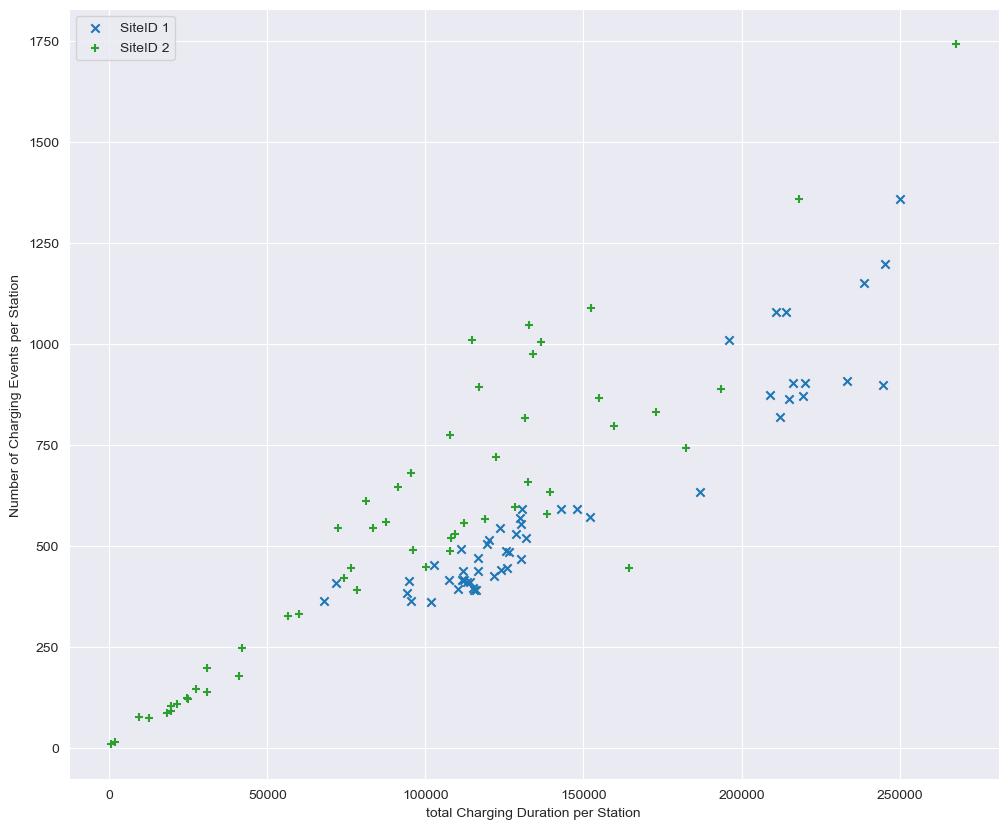

In [16]:
plt.figure(figsize = (12,10))

plt.scatter(station_duration_stats[station_duration_stats["siteID"]=='1']["totalChargingDuration"], 
           station_duration_stats[station_duration_stats["siteID"]=='1']["numChargingEvents"],marker='x', color='C0')
plt.scatter(station_duration_stats[station_duration_stats["siteID"]=='2']["totalChargingDuration"], 
           station_duration_stats[station_duration_stats["siteID"]=='2']["numChargingEvents"], marker='+', color='C2')
plt.xlabel("total Charging Duration per Station")
plt.ylabel("Number of Charging Events per Station")
plt.legend(['SiteID 1', 'SiteID 2'])


plt.show()